###Изучаем общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('/Users/vk/Documents/Dataset/real_estate_data.csv', sep = '\t')
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Тип столбца first_day_exposition необходимо помять на дату, is_apartment на булевый.Так же заметно достаточно большое кол-во пропусков в данных

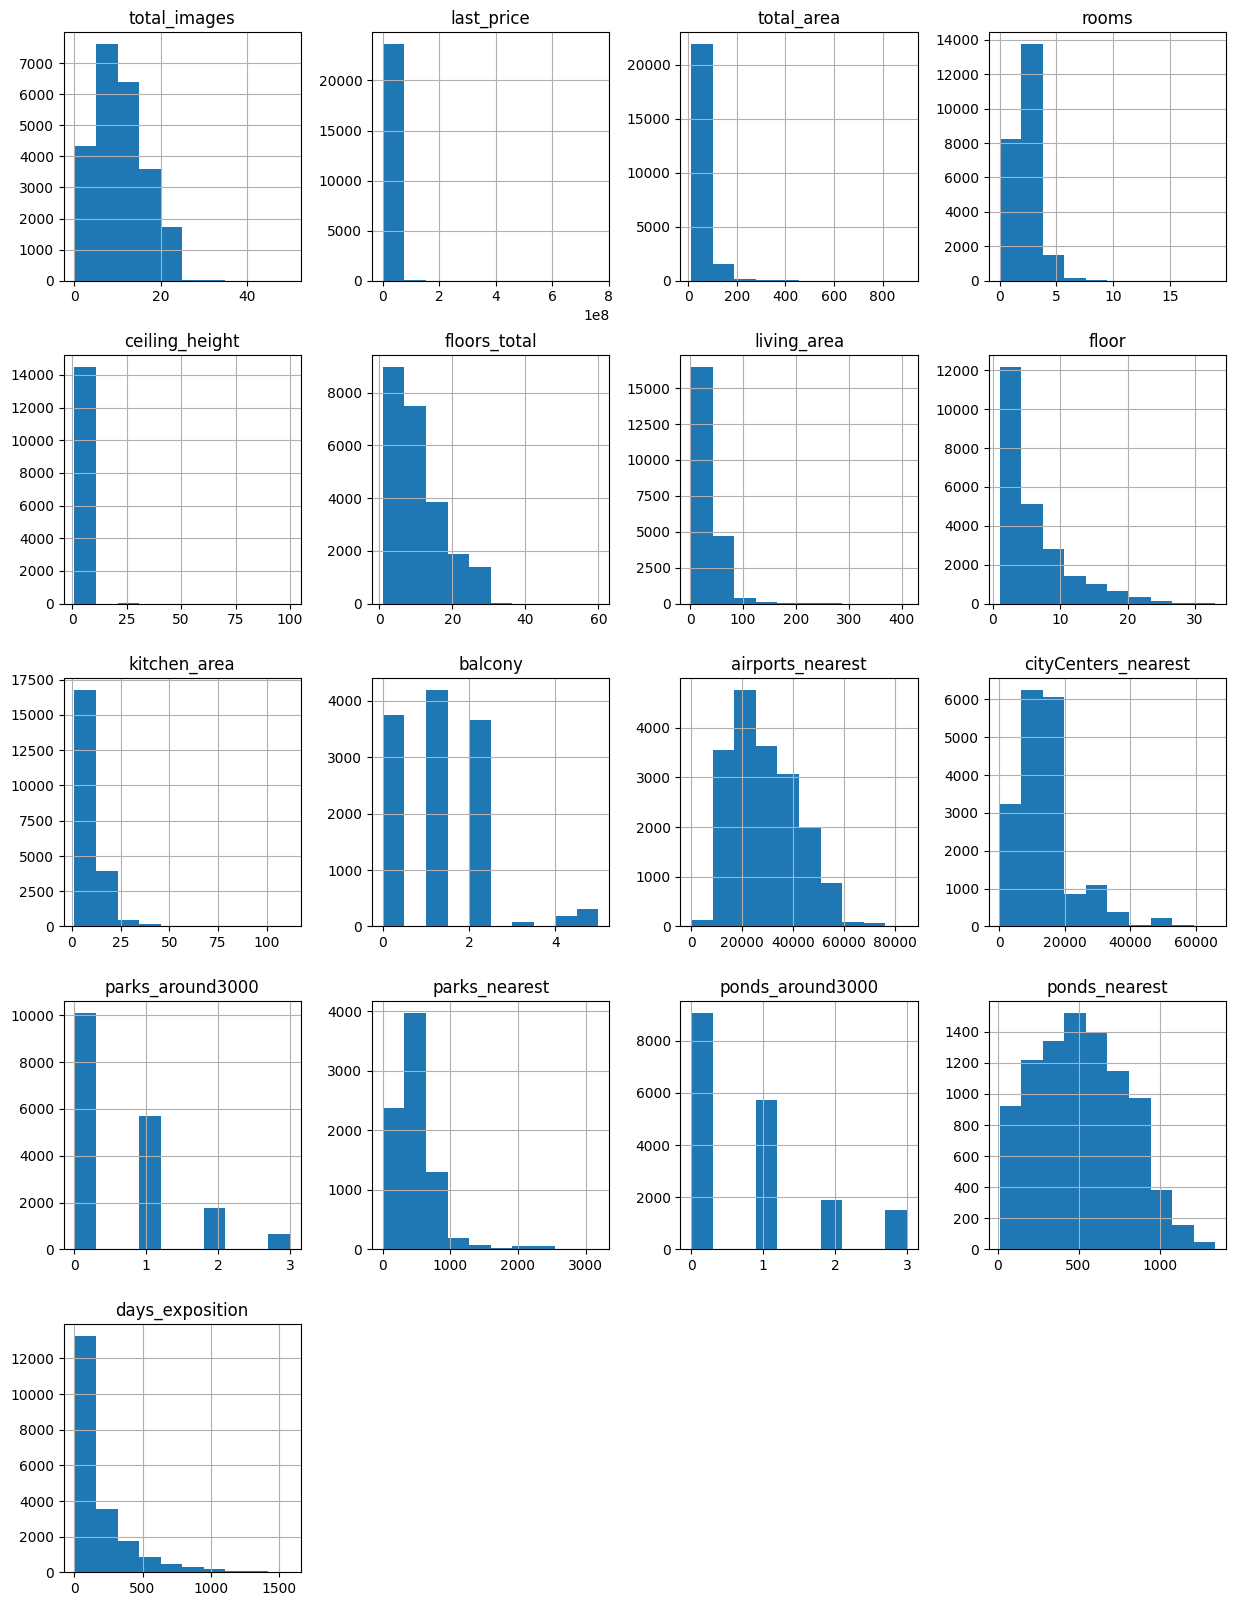

In [3]:
data.hist(figsize = (15,20));

В данных достаточно большое кол-во пропусков значений (особенно картографических данных), так же в столбце first_day_exposition и is_apartment неверный тип данных.

### Предобработка данных

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Заполнение пропусков

Возможные причины пропусков:

1. Высота потолков - скорее всего продавец не знает высоту потолка

2. Кол-во этажей в доме - скорее всего продавец не знает сколько всего этажей
 
3. Жилая площадь - видимо все заполняют общую площадь , но не все обращают внимание на жилую

4. Апартаменты - данный пункт, возможно, заполняют владельцы апартаментов, остальные просто пропускают его

5. Площадь кухни - возможно продавец не знает площадь, или это апартаменты

6. Балконы - возможно балконов в этих квартирах нет (например на первых этажах)

7. Название населенного пункта - продавцы не указывали название 

8.Расстояние до аэропорта - данный тип картографический, возможно ошибка загрузки данных 

9.Расстояние до центра - данный тип картографический, возможно ошибка загрузки данных 

10.Число парков (3 км) - отсутвие парков в пределах 3 км

11.Расстояние до парков -  данный тип картографический, возможно ошибка загрузки данных 

12.Число водоемов (3 км) - отсутствие водоемов в пределах 3 км

13.Расстояние до ближайщего водоема -  данный тип картографический, возможно ошибка загрузки данных 

14.Экспозиция - возможно квартиры были проданы в день размещения обьявления

In [5]:
# 1. Квартир с высотой потолков 0 быть не может, поэтому заполним пропуски медианным значением
 # Заполняем пропуски медианным значнием
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum() # проверяем пропуски
 

0

In [6]:
# 2.Предположим, что высотность дома не самый критичный параметр, поэтому так же заполним пропуски медианными значением
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median()) # заполняем пропуски медианным значением
data.loc[data['floors_total'] < data['floor']]
#data['floors_total'].isna().sum() # проверяем пропуски

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,2.65,9.0,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,2.65,9.0,29.00,22,NaN,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,2.65,9.0,19.40,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,2.65,9.0,32.00,12,NaN,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0
3438,10,4100000.0,38.00,2018-04-14T00:00:00,1,2.65,9.0,19.00,12,NaN,...,10.30,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,95.0
4617,4,4275062.0,61.20,2017-04-27T00:00:00,2,2.65,9.0,32.00,12,NaN,...,12.20,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,72.0
4848,15,13000000.0,98.00,2017-02-08T00:00:00,3,2.65,9.0,NaN,18,NaN,...,NaN,0.0,Санкт-Петербург,37625.0,14153.0,0.0,NaN,0.0,NaN,29.0
5146,10,3085024.0,33.33,2018-10-06T00:00:00,1,2.65,9.0,11.00,12,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,140.0
5187,5,3300000.0,25.40,2018-11-02T00:00:00,0,2.65,9.0,NaN,15,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5784,4,4262941.0,59.90,2017-04-02T00:00:00,2,2.65,9.0,31.70,18,NaN,...,11.90,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0


In [7]:
# 3.В столбце с жилой площадью порядка 8% пропусков, предположим,что застройщики придерживаются примерной одной пропорции жилой недвижимости к общей,
# и найдем такое отношение к квартирам с раз-ным кол-вом комнат
rooms_sq = data[data['living_area'].notnull()] #убираем квартиры с нулевым значеним жилой площади
#rooms_sq_pivot = rooms_sq.pivot_table(index = ['rooms'], values = ['total_area','living_area'], aggfunc = 'sum')
#living_total = rooms_sq_pivot['living_area']/rooms_sq_pivot['total_area'] # находим коэфф. отношения общей площади к жилой
# Скорее всего в данных ошибка, так как с увеличением кол-ва комнат коэфф. жилой площади должен возрастать!!!
#data['living_area'].fillna(data['total_area']*living_total.median(), inplace = True)  # заполняем пропуски с медианным значением текущего коэфф.  коэфф.
#data['living_area'].isna().sum() # проверяем пропуски
rooms_sq_pivot = rooms_sq.pivot_table(index = ['rooms'], values = ['total_area','living_area'], aggfunc = 'median')
rooms_sq_pivot['value'] = rooms_sq_pivot['living_area'] / rooms_sq_pivot['total_area']
data['living_area'].fillna(data['total_area'] * rooms_sq_pivot['value'], inplace = True)

In [8]:
# 4. Посмотрим в каких случаях значение не пропущенно 
is_apartment_true = data[(data['is_apartment'].notnull()) & (data['is_apartment'] == True)]
is_apartment_false = data[(data['is_apartment'].notnull()) & (data['is_apartment'] == False)]
#is_apartment_false
#is_apartment_true 
#На первый взляд никаких закономерностей нет, скорее всего при заполнении объявления этот пункт просто пропускали. 
#Так как нет возможности узнать апартаменты или нет, по умолчанию будемсчитать ,что не являются.
data['is_apartment'].fillna( False, inplace = True) # заменяем пропуски значениями FALSE
data['is_apartment'].isna().sum() # проверяем пропуски 

0

In [9]:
#5. Заменим отсутсвующие значения медианным значением для каждого типа квартир
kitchen_area_no = data[data['kitchen_area'].notnull()]
kitchen_area_m = kitchen_area_no.pivot_table(index = ['rooms'] , values ='kitchen_area',aggfunc = 'median') # найдем медианное значение для каждого типа квартир
kitchen_area_m # отсутствует значение квартир с кол-во комнат 0 (студии), в этом случае можно заменить пропуск на нулевое значение
data.loc[data['rooms'] == 0, 'kitchen_area'] = 0 #  меняем пропуск на нулевое значение
for index in data['rooms'].unique() :  #  меняем пропуски на медианные значения
    kitchen_m = data.loc[data['rooms'] == index,'kitchen_area'].median()
    data.loc[data['rooms'] == index,'kitchen_area'] = data.loc[data['rooms'] == index,'kitchen_area'].fillna(kitchen_m)
data['kitchen_area'].isna().sum() # проверяем пропуски 

0

In [10]:
# 6. Данные по балконам или не заполненны или их просто нет, заполняем пропуски нулевым значением
data['balcony'].fillna(0, inplace = True)
data['balcony'].isna().sum() # проверяем пропуски 

0

In [11]:
# 7. Выяснить в каком населеном пункте находиться объект логически не получится, поэтому заменям пропуски на значение " нет данных"
data['locality_name'].fillna('нет данных',inplace = True)

  8. Расстояние до аэропорта определить не получиться , поэтому оставляем пропуски

 9. Расстояние до центра определить не получиться , поэтому оставляем пропуски 

In [12]:
#Будем считать ,что данные пропущенны из-за отсутствия парков поблизости, заменяем пропуски на нулевые значения
data['parks_around3000'].fillna(0,inplace = True)

11. Расстояние до парка определить не получиться , поэтому оставляем пропуски

In [13]:
# 12. Будем считать ,что данные пропущенны из-за отсутствия водоемов поблизости, заменяем пропуски на нулевые значения
data['ponds_around3000'].fillna(0,inplace = True)

13. Расстояние до водоема определить не получиться , поэтому оставляем пропуски

In [14]:
# 14. Будем считать ,что квартиры были проданы в день размещения объявления, поэтому заполним пропуски нулевым значением
#data['days_exposition'].fillna(0,inplace = True)


In [15]:
 # выполняем итоговую проверку
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1901
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски остались в столбцах, заполнить которые логически не получится, и кол-во пропусков достаточно велико, что бы удаления повлияло на результаты исследования

#### Проверка типов данных 

In [16]:
# Столбец is_apartment переведем в тип  bool , квартира или относится к апартаментам или нет
data['is_apartment'] = data['is_apartment'].astype('bool')
# Столбец first_day_exposition переведем в форматы даты 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y.%m.%d ')
data ['balcony'] = data ['balcony'].astype('int')

#### Устраняем неявные дубликаты


In [17]:
# Смотрим какие неявные дубликаты встречаются 
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
# Так как база недвижимости относиться к одному региону, предположим ,что название населенных пунктов уникальные, уберем из названия тип населенного пункта
type_all = ['посёлок городского типа',
            'посёлок',
            'поселок городского типа',
            'городской поселок',
            'деревня',
            'поселок',
            'садовое товарищество',
           'станции',
           'городской',
           'село',
           'при железнодорожной станции',
           'садоводческое некоммерческое товарищество',
           'коттеджный',
            'при железнодорожной']
name_1 = ''
for name in type_all :
    data['locality_name'] = data['locality_name'].str.replace(name,name_1)
data['locality_name'].unique()

array(['Санкт-Петербург', ' Шушары', '  Янино-1', ' Парголово', ' Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', ' Кудрово',
       'Коммунар', 'Колпино', ' Красный Бор', 'Гатчина', ' Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', ' Новое Девяткино',
       ' Металлострой', ' Лебяжье', ' Сиверский', ' Молодцово',
       ' Кузьмоловский', ' Новая Ропша', 'Павловск', ' Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       ' Куттузи', ' Аннино', ' Ефимовский', ' Плодовое', ' Заклинье',
       ' Торковичи', ' Первомайское', 'Красное Село', ' Понтонный',
       'Сясьстрой', ' Старая', ' Лесколово', ' Новый Свет', 'Сланцы',
       ' Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', ' Оржицы', ' Кальтино', 'Кудрово',
       ' Романовка', ' Бугры', ' Рощино', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', ' Павлово', ' Оредеж', ' Копорье', ' Молодёжное',
       'Тихвин', ' Победа'

#### Устраняем выбивающиеся значения

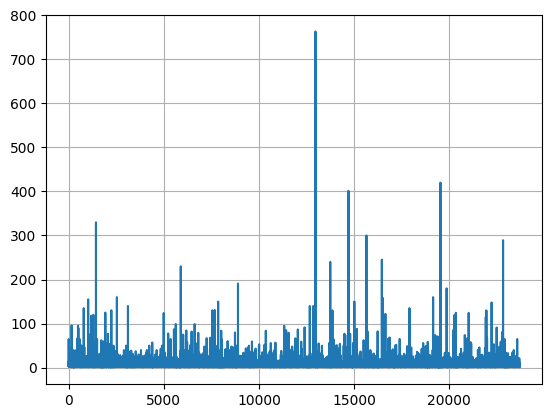

In [19]:
#  Проверим данные в слобце  last_price
#data.sort_values(by = 'last_price',ascending=False)
#  Максимальная стоимость 763 млн. выглядит подозрительно,но возможно. Минимальное значение 12 т.р, явно ошибка, удалим эту строку
data = data[data.last_price > 100000]
data.sort_values(by = 'last_price',ascending=False)
(data['last_price'] / 1000000).plot(grid = True); # Значения больше 150 млн. выглядят явными выбросами



In [20]:
data.loc[data['last_price'] > 150000000] # 15 объектов с аномальной ценой
data = data[data.last_price < 150000000] # Убираем эти строки

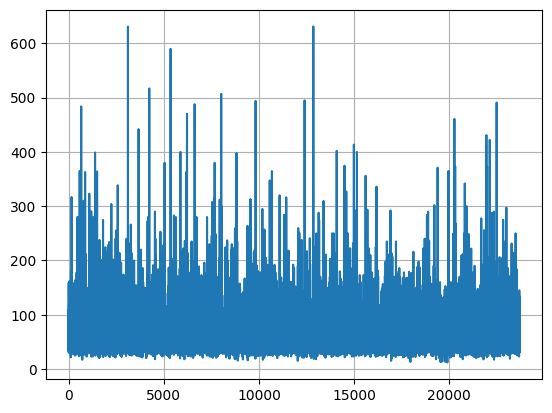

In [21]:
# Проверим значения total_area
#data.sort_values(by = 'total_area',ascending=False)
data['total_area'].plot(grid = True); # Проверяем данные с помощью графика, значения больше 400 м2 похожи на выбросы

In [22]:
data.loc[data['total_area'] > 400] # 17 объектов с аномальной стоимостью
data = data[data.total_area <400] # Убираем эти данные

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,False,...,13.3,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
813,7,16500000.0,229.0,2016-02-25,8,2.65,6.0,160.0,5,False,...,25.0,0,Санкт-Петербург,23968.0,4536.0,1.0,243.0,0.0,NaN,806.0
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,...,16.6,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,False,...,18.8,1,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN
4435,13,22190000.0,191.2,2017-12-05,8,2.90,6.0,115.8,1,False,...,5.0,0,Санкт-Петербург,21589.0,1152.0,1.0,587.0,2.0,155.0,115.0
8758,5,16100000.0,150.0,2018-07-10,8,2.92,5.0,107.0,1,False,...,7.2,0,Санкт-Петербург,26080.0,4782.0,2.0,473.0,0.0,NaN,NaN
8822,14,49968900.0,398.0,2017-07-12,9,3.00,2.0,160.1,1,False,...,41.0,0,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,471.0
8860,12,17000000.0,235.0,2018-07-14,9,3.00,6.0,NaN,3,False,...,14.3,0,Санкт-Петербург,24466.0,5034.0,1.0,346.0,0.0,NaN,90.0
9550,10,23500000.0,313.0,2017-02-13,9,3.20,6.0,179.2,5,False,...,13.2,0,Санкт-Петербург,38435.0,10138.0,1.0,146.0,0.0,NaN,NaN
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,False,...,11.9,0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0


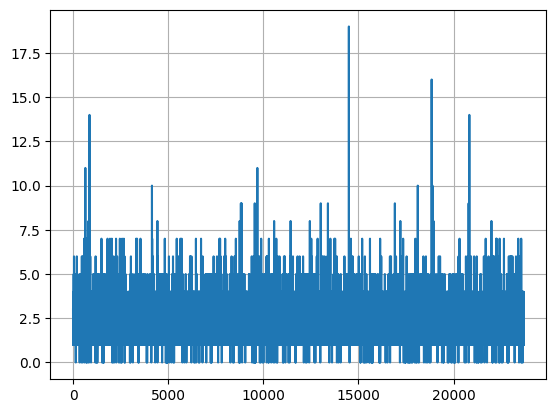

In [23]:
data['rooms'].plot(grid = True); # Значения больше 8 комнат сильно выбиваются 
data.loc[data['rooms'] >= 8] # 26 объектов 

In [24]:
data = data[data.rooms < 8] # убираем квартиры с кол-во комнат 8 и более

In [25]:
# Похоже,что данные выгружали 3 мая 2019 
data.sort_values(by = 'first_day_exposition',ascending=False)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5986,0,5000000.0,48.00,2019-05-03,3,2.50,9.0,NaN,2,False,...,9.50,0,Санкт-Петербург,51060.0,16892.0,0.0,NaN,0.0,NaN,NaN
17872,3,4650000.0,34.80,2019-05-03,1,2.50,9.0,13.90,1,False,...,11.20,0,Санкт-Петербург,12384.0,12296.0,0.0,NaN,1.0,396.0,NaN
2178,10,5100000.0,51.00,2019-05-03,1,2.65,9.0,15.00,2,False,...,25.00,0,Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,NaN
12380,9,3900000.0,35.60,2019-05-03,1,2.50,12.0,18.00,12,False,...,10.80,2,Санкт-Петербург,41522.0,12331.0,2.0,371.0,0.0,NaN,NaN
12343,12,2890000.0,48.80,2019-05-03,2,2.55,5.0,29.40,1,False,...,7.20,0,Рощино,NaN,NaN,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10132,2,16137000.0,154.76,2014-11-27,4,2.70,20.0,67.81,20,False,...,32.55,0,Санкт-Петербург,18490.0,17492.0,0.0,NaN,2.0,113.0,573.0
8393,10,8037000.0,56.20,2014-11-27,1,2.65,5.0,24.20,5,False,...,12.90,0,Санкт-Петербург,36813.0,8572.0,1.0,2467.0,3.0,214.0,972.0
15857,6,25000000.0,145.20,2014-11-27,3,2.65,5.0,60.70,5,False,...,40.20,0,Санкт-Петербург,36779.0,14931.0,0.0,NaN,0.0,NaN,NaN
3955,1,12561120.0,93.60,2014-11-27,3,3.00,16.0,52.00,5,False,...,10.90,2,Санкт-Петербург,37407.0,8434.0,1.0,456.0,2.0,454.0,583.0


In [26]:
#  проверим данные о высоте потолков
data.sort_values(by = 'ceiling_height',ascending=False)
# высота потолков больше 6 метров и меньше 2,3 выглядит подозрительно.Значения больше 24 метров явно ошибка при заполнении
data.loc[data['ceiling_height'] >= 24.0, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 24.0, 'ceiling_height'] /10
data = data[(data.ceiling_height >= 2.3) & (data.ceiling_height <6)]
data.sort_values(by = 'ceiling_height',ascending=False)
#data = data[(data.ceiling_height >= 2.3)]

data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,11.00,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,98.553719,9,False,...,9.50,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,...,8.50,0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,...,8.80,0,Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [27]:
# Проверим общее кол-во этажей
data.loc[data['floors_total'] < data['floor']]
# позиции получили медианное значение меньше чем данные об этаже квартиры, приравняем этажность дома к этажности квартиры
data.loc[data['floors_total'] < data['floor'],'floors_total'] = data['floor']


In [28]:
# Проверим площадь кухни, квартиры с кол-вом комнат ноль я принял как квартиры студии, без отдельной площади кухни 
data.loc[(data['total_area'] < data['kitchen_area']) & (data['rooms'] !=0)]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [29]:
# Проверим данные в столбце расстояние до аэропорта
data.sort_values(by = 'ceiling_height',ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21227,0,8200000.0,71.0,2017-07-21,0,5.80,5.0,68.0,5,False,...,0.00,0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
1388,20,59800000.0,399.0,2015-01-21,5,5.60,6.0,NaN,6,False,...,15.10,0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
7578,17,38000000.0,143.0,2017-11-02,3,5.50,5.0,83.0,5,False,...,29.00,1,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
12628,14,3900000.0,50.0,2018-03-29,1,5.30,5.0,NaN,5,False,...,9.04,0,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
464,15,66571000.0,280.3,2015-06-11,6,5.20,8.0,159.5,7,False,...,21.10,0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,13,2200000.0,47.0,2018-01-12,3,2.34,5.0,NaN,1,False,...,9.50,0,Новый Свет,NaN,NaN,0.0,NaN,0.0,NaN,45.0
1582,4,4100000.0,45.6,2016-01-13,2,2.30,9.0,28.4,8,False,...,7.00,2,Санкт-Петербург,49152.0,14977.0,1.0,489.0,1.0,525.0,329.0
5498,17,2200000.0,56.0,2018-04-02,2,2.30,5.0,45.0,1,False,...,9.00,2,Сясьстрой,NaN,NaN,0.0,NaN,0.0,NaN,55.0
23498,7,1600000.0,54.0,2016-12-26,2,2.30,1.0,33.0,1,False,...,3.50,0,Высоцк,NaN,NaN,0.0,NaN,0.0,NaN,281.0


In [30]:
# Проверим данные в столбце расстояни до Аэропорта, один объект находится прямо в аэропорту,удалим эту строку
data.sort_values(by = 'airports_nearest',ascending=True)
data = data[data.airports_nearest != 0]

In [31]:
# Проверим расстояния до центра города, выбивающихся значений нет
data.sort_values(by = 'cityCenters_nearest',ascending=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13694,2,31099000.0,159.0,2018-06-25,5,3.28,5.0,106.0,5,False,...,15.0,0,Санкт-Петербург,21633.0,181.0,2.0,254.0,3.0,426.0,NaN
1182,1,5800000.0,33.6,2016-03-10,1,3.70,7.0,22.8,4,False,...,6.6,0,Санкт-Петербург,21632.0,208.0,3.0,304.0,3.0,503.0,167.0
8614,7,10990000.0,100.0,2015-12-16,3,3.90,5.0,37.8,3,False,...,11.6,0,Санкт-Петербург,21818.0,215.0,3.0,229.0,2.0,511.0,265.0
1934,18,9590000.0,108.0,2017-05-23,2,3.30,5.0,59.0,2,False,...,11.0,0,Санкт-Петербург,21908.0,287.0,3.0,359.0,3.0,290.0,69.0
20873,18,11500000.0,113.5,2018-09-17,3,4.20,7.0,44.2,6,False,...,21.7,1,Санкт-Петербург,21739.0,291.0,2.0,472.0,2.0,94.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.8,2018-09-18,4,2.50,5.0,45.5,3,False,...,5.5,0,Дзержинского,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23692,2,1350000.0,30.0,2017-07-07,1,2.65,5.0,17.5,4,False,...,6.0,0,Тихвин,NaN,NaN,0.0,NaN,0.0,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15,3,2.65,5.0,38.0,4,False,...,8.5,0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.7,2018-02-11,2,2.65,3.0,29.7,1,False,...,8.8,0,Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN


In [32]:
# Проверим столбец parks_around3000, кол-во от 0 до 3-х выглядит нормальным
data.sort_values(by = 'parks_around3000',ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12877,10,5700000.0,50.20,2018-01-22,1,2.75,10.0,25.6,2,False,...,11.6,0,Сестрорецк,57413.0,34342.0,3.0,170.0,3.0,342.0,25.0
18999,19,8090000.0,55.30,2017-11-23,2,2.65,8.0,31.0,2,False,...,10.0,0,Санкт-Петербург,20691.0,3431.0,3.0,623.0,1.0,534.0,144.0
11549,3,6500000.0,66.00,2018-08-01,3,2.65,5.0,NaN,3,False,...,9.5,0,Санкт-Петербург,19521.0,14785.0,3.0,283.0,2.0,452.0,59.0
1762,7,8400000.0,91.70,2016-03-31,4,3.57,5.0,69.6,3,False,...,5.6,0,Санкт-Петербург,24294.0,2877.0,3.0,121.0,3.0,646.0,722.0
1167,14,13950000.0,100.00,2017-08-11,4,2.65,3.0,70.0,2,False,...,11.0,0,Санкт-Петербург,21111.0,2256.0,3.0,112.0,1.0,652.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12479,17,3590000.0,51.00,2018-04-03,1,2.65,9.0,26.0,9,False,...,13.0,0,Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,75.0
12480,7,3100000.0,40.21,2015-12-11,1,2.70,9.0,21.2,9,False,...,14.3,0,Старая,NaN,NaN,0.0,NaN,0.0,NaN,311.0
12481,8,3000000.0,60.40,2017-10-04,3,2.60,9.0,NaN,2,False,...,43.2,0,Коммунар,NaN,NaN,0.0,NaN,0.0,NaN,234.0
4275,7,8300000.0,60.00,2015-02-12,2,3.15,7.0,32.0,3,False,...,12.5,0,Санкт-Петербург,18748.0,4341.0,0.0,NaN,0.0,NaN,813.0


In [33]:
# Проверим столбец parks_nearest,  значения с расстоянием до парка ближе 10 метров выглядят подозрительно
data.sort_values(by = 'parks_nearest',ascending=True)
data.drop(data[data['parks_nearest'] <10].index,inplace = True)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,11.00,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,98.553719,9,False,...,9.50,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,...,8.50,0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,...,8.80,0,Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [34]:
# Проверим пруды в радиусе 3км , кол-во от 0 до 3-х выглядит нормальным
data.sort_values(by = 'ponds_around3000',ascending=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11840,15,5000000.0,58.80,2017-08-16,3,2.50,9.0,37.6,8,False,...,7.00,1,Санкт-Петербург,49819.0,15377.0,1.0,514.0,0.0,NaN,432.0
13872,10,3990000.0,58.00,2017-09-27,2,2.65,9.0,40.0,9,False,...,10.00,0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,42.0
13873,14,4580000.0,45.80,2017-01-09,2,2.65,9.0,28.7,7,False,...,7.00,0,Санкт-Петербург,17625.0,15500.0,1.0,812.0,0.0,NaN,52.0
13875,10,2000000.0,34.50,2017-06-13,1,2.65,3.0,13.9,3,False,...,9.80,0,Лесколово,NaN,NaN,0.0,NaN,0.0,NaN,125.0
13876,12,2290000.0,40.00,2016-01-17,2,3.00,3.0,27.0,2,False,...,7.40,0,Гатчина,NaN,NaN,0.0,NaN,0.0,NaN,895.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18436,10,2550000.0,31.10,2017-04-26,1,2.55,5.0,17.0,1,False,...,5.50,0,Петергоф,39740.0,32726.0,3.0,474.0,3.0,470.0,41.0
3289,15,14450000.0,95.50,2017-09-13,4,2.65,4.0,63.4,4,False,...,11.50,0,Санкт-Петербург,23341.0,2442.0,1.0,616.0,3.0,820.0,90.0
21303,12,5800000.0,57.40,2018-12-15,2,2.50,10.0,30.0,3,False,...,11.50,5,Санкт-Петербург,35091.0,15393.0,2.0,465.0,3.0,213.0,56.0
13818,18,7905000.0,54.08,2018-06-20,1,2.75,20.0,NaN,10,False,...,21.82,2,Санкт-Петербург,39204.0,10430.0,2.0,627.0,3.0,77.0,88.0


In [35]:
# Проверим данные ponds_nearest. Выбивающихся значений нет 
data.sort_values(by = 'ponds_nearest',ascending=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1548,1,12300000.0,90.0,2018-03-03,3,2.65,8.0,55.00,3,False,...,14.00,0,Санкт-Петербург,18689.0,17691.0,1.0,1145.0,2.0,13.0,347.0
17585,14,12900000.0,86.0,2018-12-08,3,2.65,8.0,45.00,7,False,...,22.00,0,Санкт-Петербург,18689.0,17691.0,1.0,1145.0,2.0,13.0,NaN
22077,11,10300000.0,84.3,2017-12-08,3,2.65,8.0,51.30,5,False,...,12.30,0,Санкт-Петербург,18140.0,17143.0,1.0,1514.0,2.0,16.0,78.0
1733,8,8300000.0,70.0,2016-01-29,2,3.20,8.0,42.00,7,False,...,12.00,2,Санкт-Петербург,18140.0,17143.0,1.0,1514.0,2.0,16.0,200.0
10358,8,16399282.0,205.0,2017-06-29,4,2.65,8.0,84.69,1,False,...,11.36,0,Санкт-Петербург,18140.0,17143.0,1.0,1514.0,2.0,16.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000.0,52.0,2018-07-19,2,2.65,5.0,31.00,2,False,...,6.00,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07,1,2.65,5.0,17.50,4,False,...,6.00,0,Тихвин,NaN,NaN,0.0,NaN,0.0,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15,3,2.65,5.0,38.00,4,False,...,8.50,0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.7,2018-02-11,2,2.65,3.0,29.70,1,False,...,8.80,0,Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN


In [36]:
# Проверим данные в days_exposition.Выбивающихся значений нет 
data.sort_values(by = 'days_exposition',ascending=True)



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1632,19,4000000.0,49.90,2019-05-01,2,2.50,9.0,25.0,1,False,...,10.00,0,Санкт-Петербург,13567.0,14384.0,1.0,20.0,1.0,681.0,1.0
13061,20,6100000.0,51.40,2019-04-29,2,3.00,5.0,31.7,4,False,...,6.90,1,Санкт-Петербург,10776.0,9389.0,0.0,NaN,0.0,NaN,2.0
16053,4,4070000.0,45.10,2019-04-30,2,2.65,5.0,22.7,3,False,...,6.60,0,Санкт-Петербург,40859.0,11668.0,2.0,485.0,0.0,NaN,2.0
16212,0,7806000.0,25.00,2019-04-30,1,3.00,5.0,NaN,5,False,...,9.04,0,Санкт-Петербург,36525.0,10302.0,0.0,NaN,0.0,NaN,2.0
16503,1,4400000.0,87.00,2016-06-20,1,2.65,25.0,NaN,13,False,...,16.00,0,Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26.0,71.4,17,False,...,15.60,0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5.0,17.3,5,False,...,5.60,1,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,8.80,0,Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN


### Посчитайте и добавьте в таблицу новые столбцы

In [37]:
# Добавим столбец стоимость за м2
data['price_per_sqm'] = round(data['last_price']/data['total_area'],2)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,98.553719,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.85
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,...,0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0,52542.37
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,...,0,Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN,44091.71
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.40


In [38]:
# Добавим столбец с днем недели
data['weekday'] = data['first_day_exposition'].dt.weekday

In [39]:
# Добавим столбец с месяцем
data['month'] = data['first_day_exposition'].dt.month

In [40]:
# Добавим столбец с годом
data['year'] = data['first_day_exposition'].dt.year
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,98.553719,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,4232.0,1.0,796.0,3.0,381.0,NaN,72490.85,1,3,2017
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,...,NaN,0.0,NaN,0.0,NaN,45.0,52542.37,0,1,2018
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,...,NaN,0.0,NaN,0.0,NaN,NaN,44091.71,6,2,2018
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,10364.0,2.0,173.0,3.0,196.0,602.0,149511.40,1,3,2017


In [41]:
#Добавим столбец с типом этажа квартиры
data['floor_type'] = data['floor']
data.loc[data['floor_type'] == 1, 'floor_type'] = 'Первый'
data.loc[data['floor_type'] == data['floors_total'], 'floor_type'] = 'Последний'
data.loc[(data['floor_type'] != 'Первый') & (data['floor_type'] != 'Последний'),'floor_type'] = 'Другой'



In [42]:
# Добавим столбец с расстоянием до центра в км 
data['city_km'] = round(data['cityCenters_nearest'] / 1000,0)


In [43]:
import matplotlib.pyplot as plt

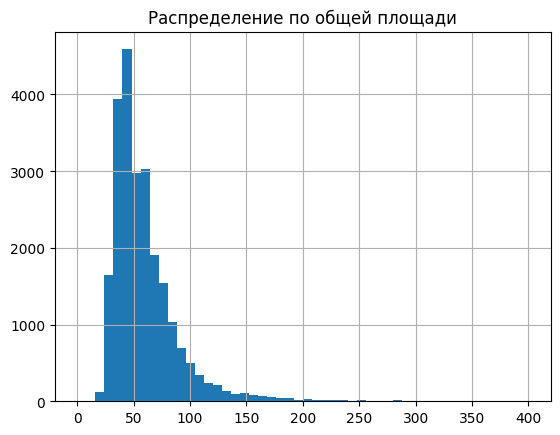

In [44]:
#  Построим гистограммму по общей площади 
data['total_area'].hist(bins = 50, range = (0,400));
plt.title('Распределение по общей площади')
plt.show()

Распределение похоже на нормальное, болшая часть предложений с площадью от 25 до 75 м2

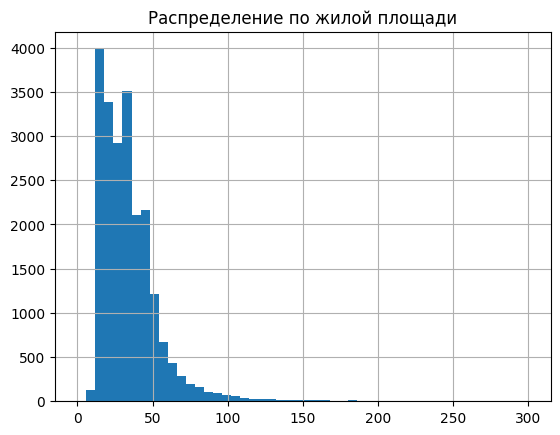

In [45]:
#  Построим гистограммму по жилой площади 
data['living_area'].hist(bins = 50, range = (0,300));
plt.title('Распределение по жилой площади')
plt.show()

Распределение похоже на нормальное, есть выброс на 25 м2

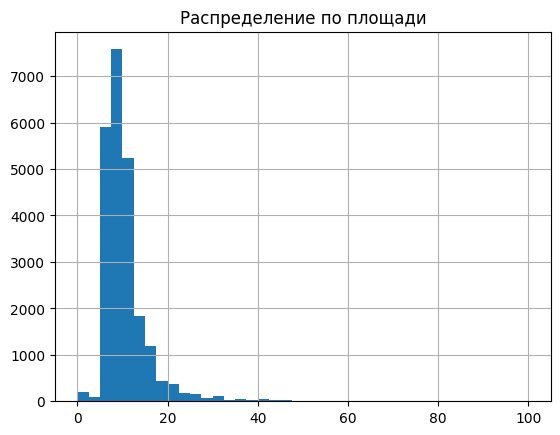

In [46]:
#  Построим гистограммму по площади кухни
data['kitchen_area'].hist(bins = 40, range = (0,100));
plt.title('Распределение по площади')
plt.show()

Распределение похоже на нормальное

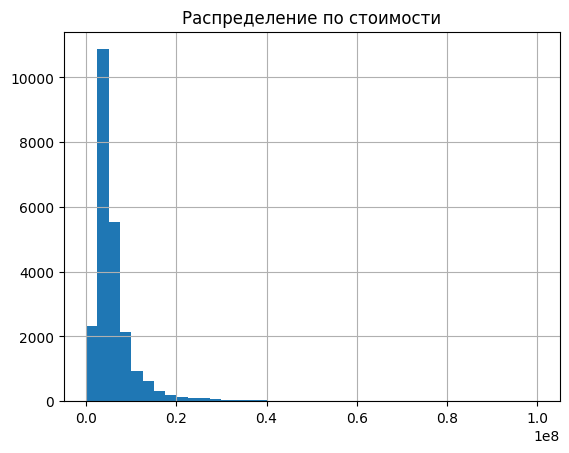

In [47]:
#  Построим гистограммму по стоимости

data['last_price'].hist(bins = 40, range = (0,100000000));
plt.title('Распределение по стоимости')
plt.show()

Распределение похоже на нормальное

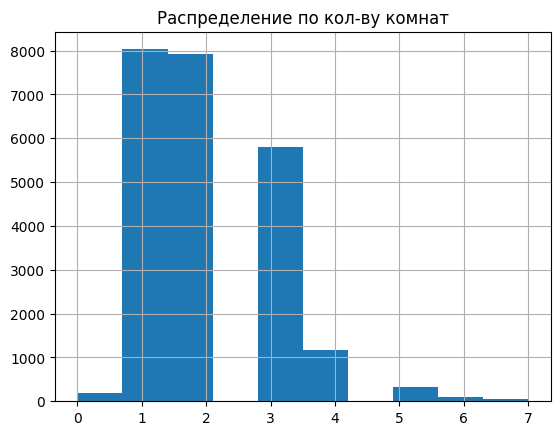

In [48]:
#  Построим гистограммму по кол-ву комнат
data['rooms'].hist(bins = 10);
plt.title('Распределение по кол-ву комнат')
plt.show()

  Больше всего однокомнатных и двухкомнатных квартир, что логично

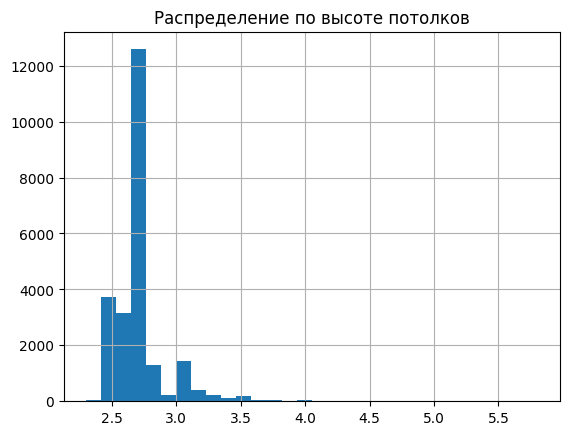

In [49]:
#  Построим гистограммму по высоте потолков
data['ceiling_height'].hist(bins = 30);
plt.title('Распределение по высоте потолков')
plt.show()

Самое большое кол-во с высотой 2,7 м,

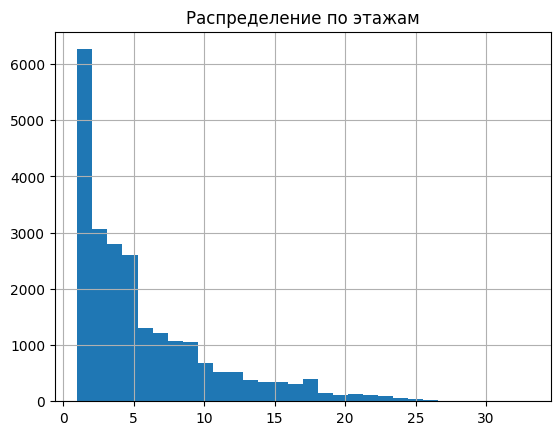

In [50]:
#  Построим гистограммму по этажу расположения квартиры
data['floor'].hist(bins = 30);
plt.title('Распределение по этажам')
plt.show()

Скорее всего, большая часть квартир продается в 5 этажных домах

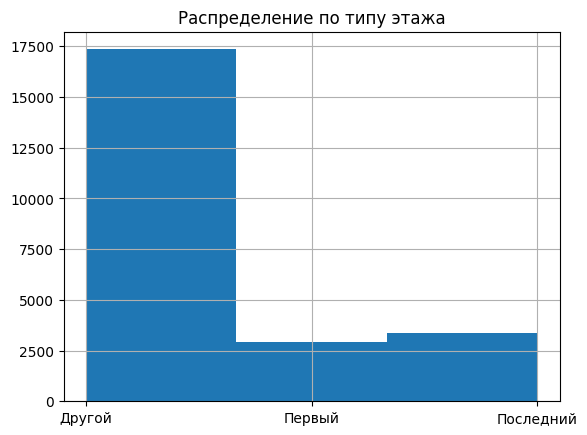

In [51]:
#  Построим гистограммму по типу этажа расположения квартиры
data['floor_type'].hist(bins = 3);
plt.title('Распределение по типу этажа')
plt.show()

Кол-во предложений на первом и последнем этаже практически одинако, что логично , первых и последних этажей тоже одинаковое кол-во

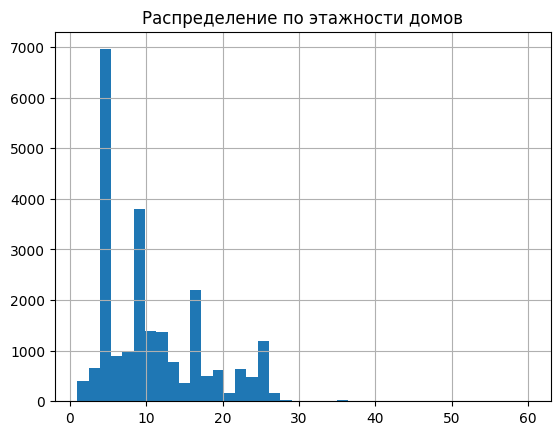

In [52]:
#  Построим гистограммму по кол-ву  этаежей в  доме
data['floors_total'].hist(bins = 40);
plt.title('Распределение по этажности домов')
plt.show()

Предположение о 5 этажных домах подтвердилось

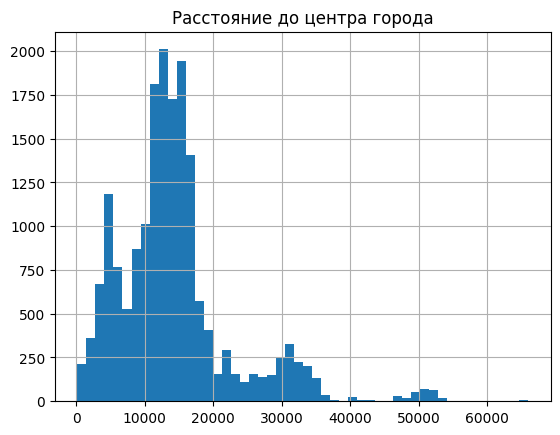

In [53]:
#  Построим гистограммму расстояния до центра города
data['cityCenters_nearest'].hist(bins = 50);
plt.title('Расстояние до центра города')
plt.show()

На гистограмме есть явный выброс около 5 и 17 км, возможно это связано с пропусками данных

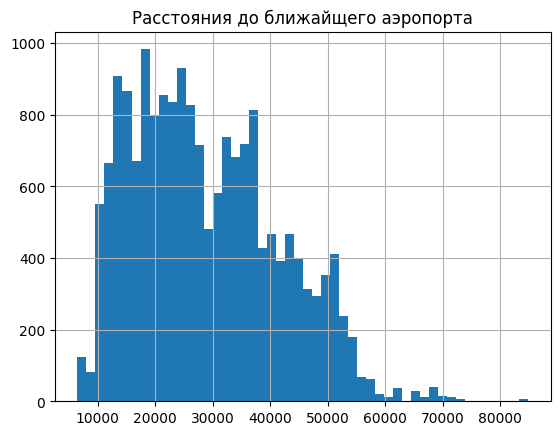

In [54]:
#  Построим гистограммму расстояния до ближайщего аэропорта
data['airports_nearest'].hist(bins = 50);
plt.title('Расстояния до ближайщего аэропорта')
plt.show()

На гистограмме присутствуют выбросы, возможно это связано с пропусками данных

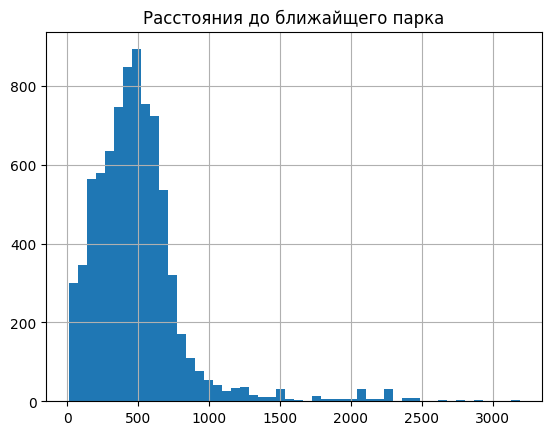

In [55]:
#  Построим гистограммму расстояния до ближайщего парка
data['parks_nearest'].hist(bins = 50);
plt.title('Расстояния до ближайщего парка')
plt.show()

Распределение похоже на нормальное, больше всего объектов расположенных не дальше километра от парка

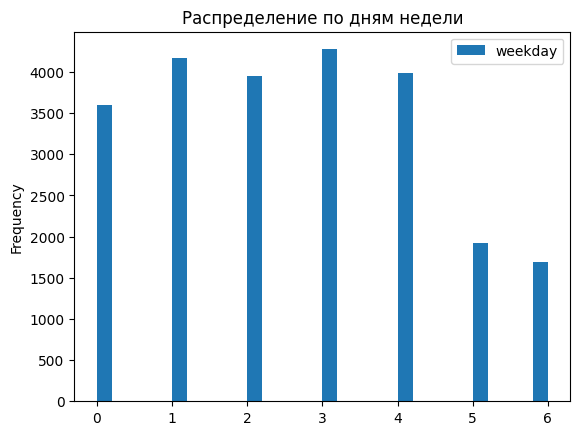

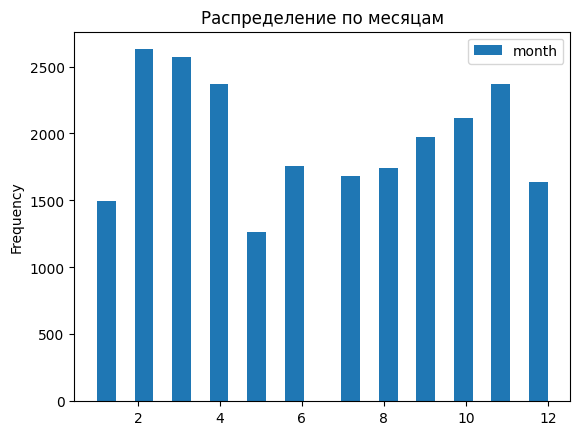

In [56]:
# Построим гистограмму для дня и месяца расзмешения публикации
data.plot(kind = 'hist', y = 'weekday', bins = 30);
plt.title('Распределение по дням недели')
data.plot(kind = 'hist', y = 'month',  bins = 24);
plt.title('Распределение по месяцам')
plt.show()

Реже всего объявления размешают по выходным и в период отпусков ( летом и в новый год)

Медианное время продажи квартиры 95.0 дней
Среднее время продажи квартиры 181.0 дней


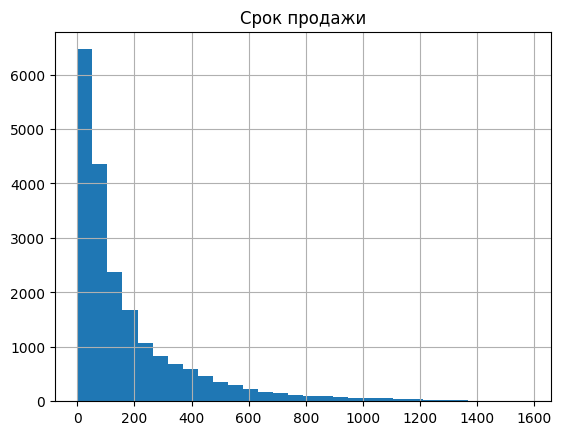

count    20441.000000
mean       180.641896
std        219.418775
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [57]:
# Посмтотрим ка быстро продавлись квартиры 
days_ex_median = round(data['days_exposition'].median(),0)
days_ex_mean = round(data['days_exposition'].mean(),0)
data['days_exposition'].hist( bins = 30, range = (0,data['days_exposition'].max()));
print(f'Медианное время продажи квартиры {days_ex_median} дней')
print(f'Среднее время продажи квартиры {days_ex_mean} дней')
plt.title('Срок продажи')
plt.show()
data['days_exposition'].describe()

75 % квартир продается в течении 231 дня, при этом медианное значение 95 дней, быстрой продажей может считать срок до медианного значения, а необычно долгими со сроком более 231 дня

              last_price  kitchen_area  living_area  total_area
last_price      1.000000      0.550479     0.722409    0.784547
kitchen_area    0.550479      1.000000     0.475897    0.572344
living_area     0.722409      0.475897     1.000000    0.942420
total_area      0.784547      0.572344     0.942420    1.000000


,last_price,kitchen_area,living_area,total_area
0,430000.0,7.40,16.0,42.20
1,440000.0,9.04,NaN,40.00
2,450000.0,7.15,23.0,40.25
3,470000.0,9.00,30.0,41.00
4,480000.0,9.04,16.0,32.00
...,...,...,...,...
2939,130278280.0,15.10,NaN,304.00
2940,131000000.0,15.10,150.0,380.00
2941,135000000.0,57.00,151.0,238.00
2942,140000000.0,15.10,NaN,241.00


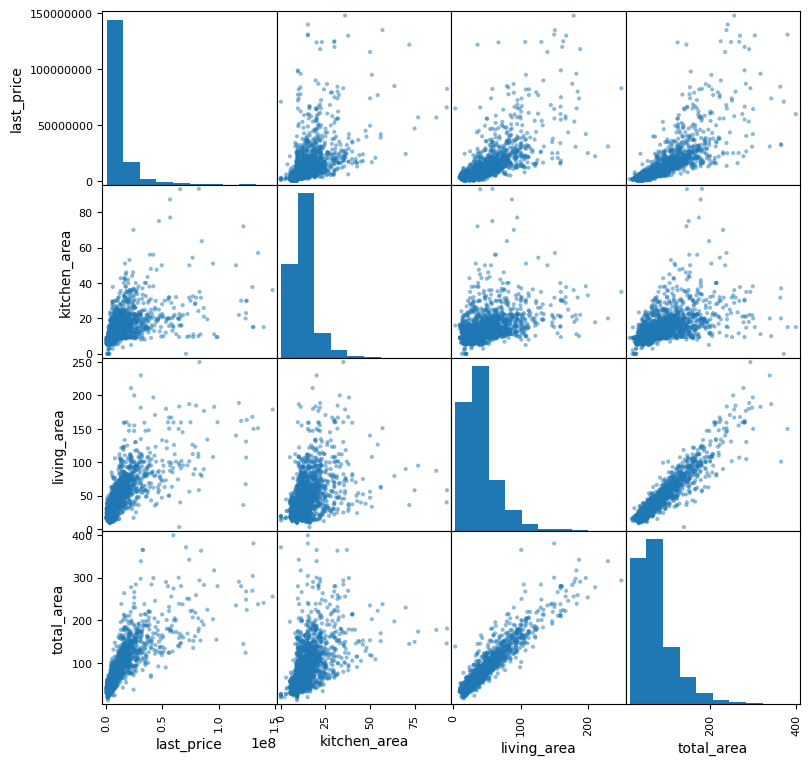

In [58]:
 # Изучим как параметры площади влияют на стоимость
#data['total_area'].value_counts()
price_area = data.pivot_table(index ='last_price',
                                    values = ['total_area','living_area','kitchen_area'], 
                                    aggfunc = 'median'
                                   )
price_area.reset_index(drop = False,inplace = True)
print(price_area.corr())
pd.plotting.scatter_matrix(price_area, figsize = (9,9));
price_area


                  floor_type_index  last_price
floor_type_index          1.000000    0.423967
last_price                0.423967    1.000000


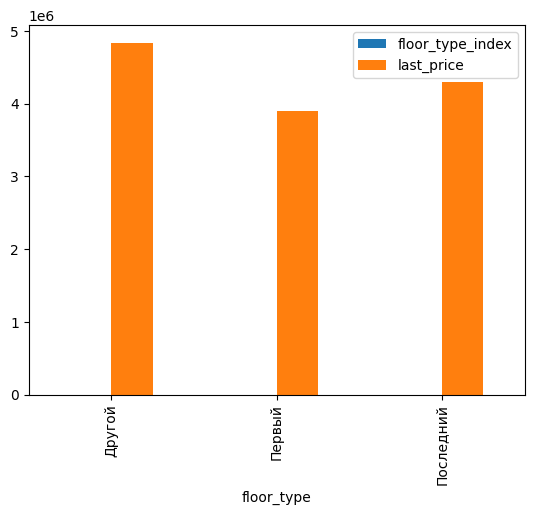

In [59]:
# Изучим как расположение на эатаже влияет на стоимость
data['floor_type_index'] = data['floor_type'].replace(['Первый','Другой','Последний'],[1,2,3])
price_floor_type = data.pivot_table(index = 'floor_type', values = ['floor_type_index', 'last_price'], aggfunc = 'median')
print(price_floor_type.corr())
price_floor_type.plot(kind = 'bar');

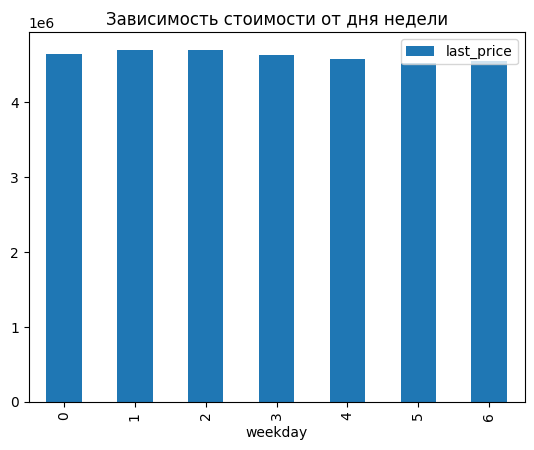

In [60]:
price_weekday = data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'median')
price_weekday.reset_index(drop = False, inplace = True)
price_weekday.plot(kind = 'bar', x = 'weekday', y= 'last_price',title = 'Зависимость стоимости от дня недели');

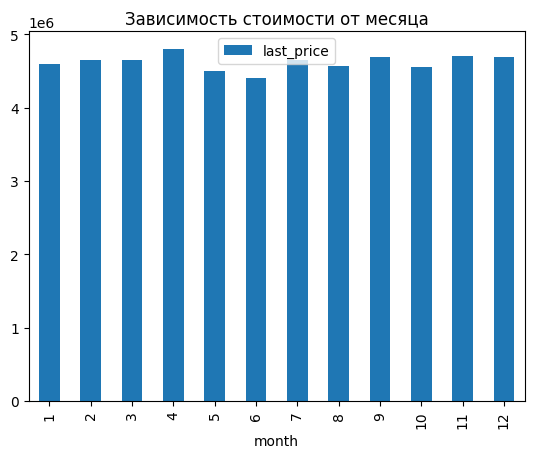

In [61]:
price_month = data.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median')
price_month.reset_index(drop = False, inplace = True)
price_month.plot(kind = 'bar',x = 'month',y = 'last_price',title = 'Зависимость стоимости от месяца');

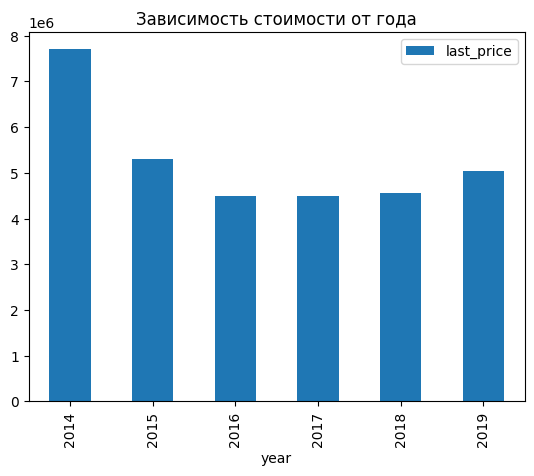

In [62]:
price_year = data.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median')
price_year.reset_index(drop = False, inplace = True)
price_year.plot(kind = 'bar', x = 'year',y = 'last_price',title = 'Зависимость стоимости от года');

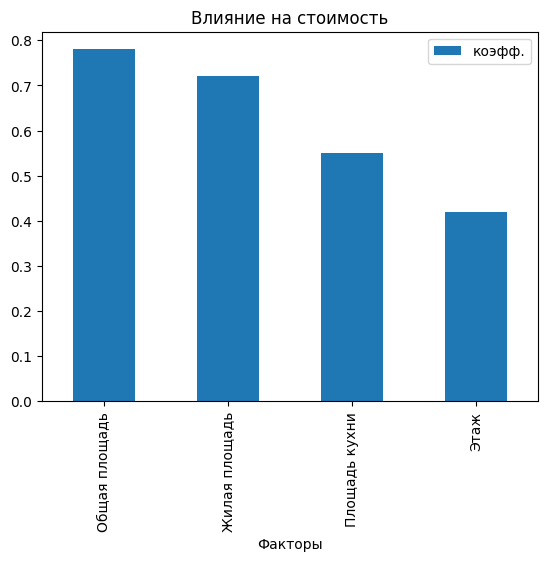

In [63]:

df=pd.DataFrame(
               {'Факторы':['Общая площадь','Жилая площадь','Площадь кухни','Этаж'],
                'коэфф.':[0.78,0.72,0.55,0.42]}
               )
df.plot( kind= 'bar', x = 'Факторы', y = 'коэфф.', title = 'Влияние на стоимость');

Больше всего на стоимость влияет общая площадь (0,78), жилая площадь (0,73), площадь кухни (0,55), и расположение на этаже ( 0,42). Практически не влияют на стоимость месяц и день размешения объявления 


In [64]:
top_10_price = data.pivot_table(index = 'locality_name', values = 'price_per_sqm', aggfunc = 'mean')
top_10_count = data['locality_name'].value_counts()
top_10 = top_10_price.join(top_10_count)
top_10.columns =['price_per_sqm','count']
top_10.reset_index(drop = False, inplace = True)
top_10 = top_10.sort_values(by ='count',ascending=False).head(10)

print (f'Самая высокая цена в {top_10["locality_name"].head(1)}')
print (f'Самая низкая цена в {top_10["locality_name"].tail(1)}')

Самая высокая цена в 311    Санкт-Петербург
Name: locality_name, dtype: object
Самая низкая цена в 282    Выборг
Name: locality_name, dtype: object


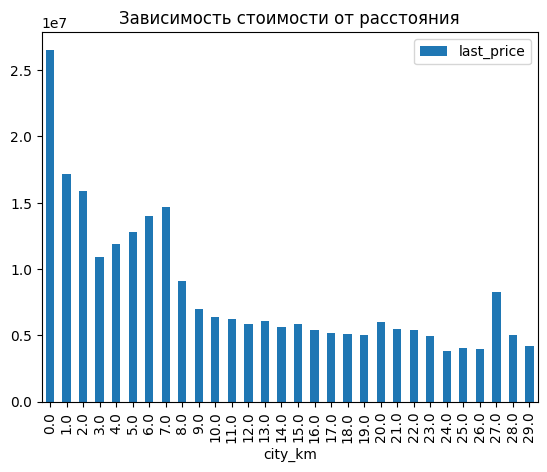

In [65]:
Spb_price = data.loc[data['locality_name'] == 'Санкт-Петербург']
Spb_price_per_km =round(Spb_price.pivot_table( index = 'city_km', values = 'last_price', aggfunc = 'mean'),0)
Spb_price_per_km.plot( kind = 'bar',title = 'Зависимость стоимости от расстояния' , );


Стоимость уменьшается по мере удаления от центра ( за исключением расстояния от 3 до 5 километров, что может быть связано с старым фондом или наличием промзон) , выброс на 27 км, связан с малым кол-вом объектов (2 шт) и соотвественно завышенной медианой стоимости.

### Общий вывод

В ходе исследования были выполнены следующие действия :
 - Были изучены предоставленные данные. Определены и заполнены, где возможно, пропуски.Устранены дублирующиеся названия населенных пунктов и выбивающиеся значения в даных
 - Добавлены следующие данные : цена за м2, данные о типе этажа, время публикации объявления ( день, месяц, год)
 - Построены графики для каждого параметра
 - Изучили время продаж квартиры, было определено среднее и медианное время продажи квартиры
 - Были определены факторы наиболее влияющие на стоимость 
 - Найдены 10 населенных пунктов с наибольшим кол-вом объявлений, определена самая низкая и высокая стоимость м2 в этих городах
 - Отсортированы объявления из г. Санкт - Петербурга, и определена цена за м2 для  каждого км от центра города

В результате исследования сделаны следующие выводы :

 - В данных большое кол-во картографических пропусков
 - Большая часть объектов одна или двухкомнатная квартира, площадью от 25 до 75 м2, расположенная в 5 этажном доме, расстояние до центра от 10 до 20 км, большинство объектов расположенны не дальше 1 км от парка
 - Реже всего объявления размешают по выходным и в период отпусков ( летом и в новый год)
 - 75 % квартир продается в течении 231 дня, при этом медианное значение 95 дней, быстрой продажей может считать срок до медианного значения, а необычно долгими со сроком более 231 дня
 - Больше всего на стоимость влияет общая площадь (0,78), жилая площадь (0,73), площадь кухни (0,55), и расположение на этаже ( 0,42). Практически не влияют на стоимость месяц и день размешения объявления. Так же можно увидеть ,что с 2014 по 2016 год стоимость недвижимости падала, с 2016 по 2018 не менялась, рост начался только в 2019 года. 
 - Из городов с наибольшем кол-вом объявлений, самая высокая цена в г. Санкт-Петербурге, самая низкая в г.Выборг
 - В г. Санкт-петербурге стоимость уменьшается по мере удаления от центра ( за исключением расстояния от 3 до 5 километров, что может быть связано с старым фондом или наличием промзон) , выброс на 27 км, связан с малым кол-вом объектов (2 шт) и соотвественно завышенной медианой стоимости.
 
 
 